код функций - в конце файла \
нужно сначала запустить его

$$ 0 = - y - 2k_1 \cdot z \cdot y - k_2 \cdot z^2 + D \cdot \frac{\partial^2 y}{\partial x^2} + \lambda $$ \
$$ 0 = - z - 2k_2 \cdot z \cdot y - k_1 \cdot y^2 + D \cdot \frac{\partial^2 z}{\partial x^2} + \lambda $$

#### граничные условия

$$y \, (A) = 0$$ \
$$y \, (- A) = 0$$ \
$$z \, (A) = 0$$ \
$$z \, (- A) = 0$$

## Решения системы
Граничные условия - первые производные

In [8]:
def boarder_values_(l):
    return np.array([l[0], l[1], l[4], l[5]])
#  0      1      2      3     4    5    6     7   
# y(-A) z(-A) y'(-A) z'(-A) y(A) z(A) y'(A) z'(A)
linsp = [-2, 2, 3]
bc = boarder_values_

In [9]:
filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])

# Строим график $\lambda - Det $ #

D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(-10, 10, 200)


<ipython-input-13-c34cbacdaf35>:7: RuntimeWarning: overflow encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-13-c34cbacdaf35>:7: RuntimeWarning: invalid value encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-13-c34cbacdaf35>:14: RuntimeWarning: overflow encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2
<ipython-input-13-c34cbacdaf35>:14: RuntimeWarning: invalid value encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2


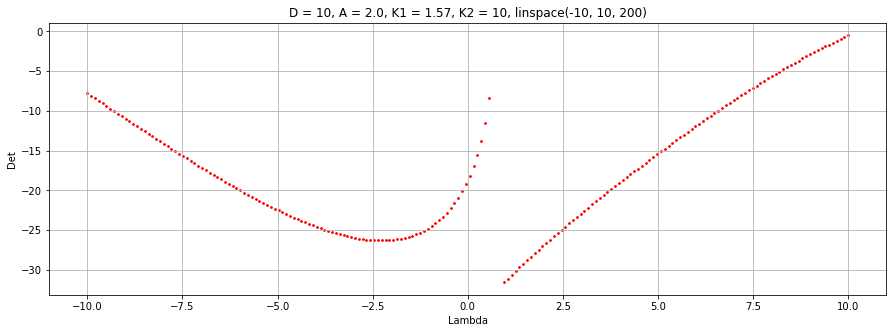

In [122]:
for ij in [1.57]:
    D, A = 10, 2.0
    K1, K2 = ij, 10
    #k11, k12, k13, k21, k22, k23 = 0, K1, K2, 0, K2, K1
    k11, k12, k13, k21, k22, k23 = 0, ij, 10, 0, 10, ij
    init_approx = [0] * 4
    linsp = [-10, 10, 200]
    lambdas = np.linspace(linsp[0], linsp[1], linsp[2])
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = ij, K2 = 10, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    
    K = [k11, k12, k13, k21, k22, k23]
    
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 1000, filename)
    # scatterNoBlowouts(lambdas_for_plot, dets, 'D = ' + str(D) + '; ' + str(K), plot = True)
    
    fig = plt.figure(figsize=(15, 5))
    ax = fig.gca()    
    ax.set_xlabel("Lambda")
    ax.set_ylabel("Det")
    plt.scatter(lambdas_for_plot, dets, s = 3, color = 'red')
    plt.title('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = ij, K2 = 10, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    plt.grid()
    plt.show()

Что происходит в точке около 17? (см график нормы)

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #

D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(-32, -200, 600)


<ipython-input-127-c34cbacdaf35>:7: RuntimeWarning: overflow encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-127-c34cbacdaf35>:7: RuntimeWarning: invalid value encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-127-c34cbacdaf35>:14: RuntimeWarning: overflow encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2
<ipython-input-127-c34cbacdaf35>:14: RuntimeWarning: invalid value encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2


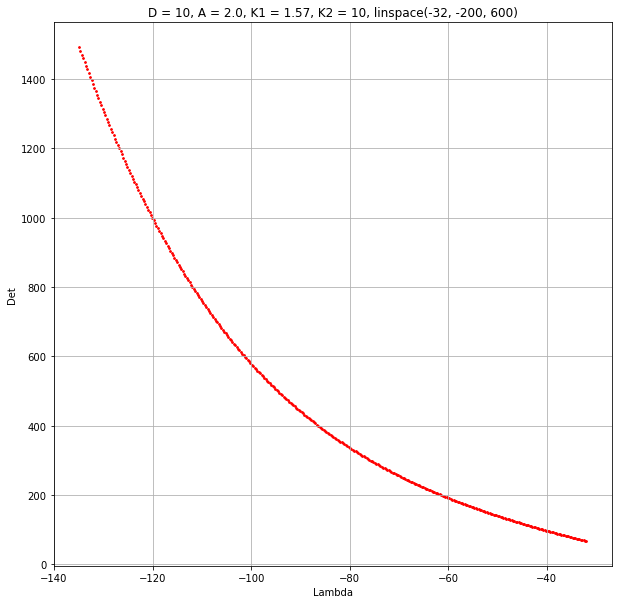

In [151]:
for ij in [1.57]:
    D, A, K1, K2 = 10, 2.0, ij, 10
    k11, k12, k13, k21, k22, k23 = 0, ij, 10, 0, 10, ij   #  0, K1, K2, 0, K2, K1
    # init_approx = [0] * 4
    init_approx =  [7.65796841e-20, 6.31011425e-22, 1.52523164e+00, 9.90371807e-01]
    linsp = [-32, -200, 600]
    lambdas = np.linspace(linsp[0], linsp[1], linsp[2])
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = ij, K2 = 10, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    K = [k11, k12, k13, k21, k22, k23]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 1000, filename)
    # scatterNoBlowouts(lambdas_for_plot, dets, 'D = ' + str(D) + '; ' + str(K), plot = True)
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca()    
    ax.set_xlabel("Lambda")
    ax.set_ylabel("Det")
    plt.scatter(lambdas_for_plot, dets, s = 3, color = 'red')
    plt.title('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = ij, K2 = 10, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    plt.grid()
    plt.show()

# Строим график $\lambda - Norm $ #

## лямбда, полученные выше

## Lambda_svd

## La = 0.93

D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(-0.07099999999999995, 1.929, 200)


<ipython-input-7-c34cbacdaf35>:7: RuntimeWarning: overflow encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-7-c34cbacdaf35>:7: RuntimeWarning: invalid value encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-7-c34cbacdaf35>:14: RuntimeWarning: overflow encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2
<ipython-input-7-c34cbacdaf35>:14: RuntimeWarning: invalid value encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2
<ipython-input-6-137c9ee1b564>:90: RuntimeWarning: invalid value encountered in less
  if (np.abs(redisuals) < 1e-6).all():


Det Change, lambda = 0.84
y_approx =  [ 2.15557475e-20 -2.04756394e-20 -1.93409205e-01 -2.28026109e-01]  la =  0.843572864321608
init_approx = [0.01, 0.01, -0.19709465699999998, -0.238118371]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(-0.07099999999999995, 1.929, 200)
Det Change, lambda = 0.84
y_approx =  [ 2.15557475e-20 -2.04756394e-20 -1.93409205e-01 -2.28026109e-01]  la =  0.843572864321608
init_approx = [-5.44816131e-22, 1.20091568e-22, -0.207094657, -0.248118371]


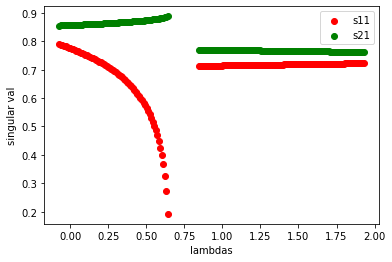

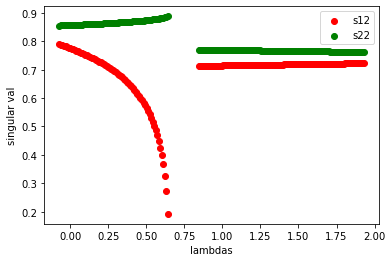

In [22]:
La = 0.929
y0 =  [-5.44816131e-22,  1.20091568e-22, -2.07094657e-01, -2.48118371e-01]
eps = 1e-3
delta = 1

stepsNorms = []
stepsSingVal = []
for init_approx in [[i + 10 * eps for i in y0], y0]: # , [i - 10 * eps for i in y0]]:
    K1, K2 = 1.57, 10
    D, A = 10, 2.0
    linsp = [La - 1, La + 1, 200]
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    K = [0, K1, K2, 0, K2, K1]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle, lam_steps, s1, s2 = lambda_iterate_svd(linsp, D, K, A, init_approx, system, bc, 50000, filename)
#     print("len pos sing val = ", len(pos_sing_values))
    stepsSingVal.append([lam_steps, s1, s2])
#     print("stepsSingval = ", stepsSingVal[-1])
    print('init_approx =', str(init_approx))
    steps, y_norm, z_norm = norm_param(linsp, D, K, A, init_approx, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])

j = 1
for [steps, s1, s2] in stepsSingVal:
    plt.scatter(steps, s1, color = "red", label = 's1' + str(j))
    plt.scatter(steps, s2, color = "green", label = 's2' + str(j))
    plt.xlabel("lambdas")
    plt.ylabel("singular val")
    plt.legend()
    plt.show()
    j+= 1


D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(0, 10, 50)


<ipython-input-7-c34cbacdaf35>:7: RuntimeWarning: overflow encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-7-c34cbacdaf35>:7: RuntimeWarning: invalid value encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-7-c34cbacdaf35>:14: RuntimeWarning: overflow encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2
<ipython-input-7-c34cbacdaf35>:14: RuntimeWarning: invalid value encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2
<ipython-input-6-137c9ee1b564>:90: RuntimeWarning: invalid value encountered in less
  if (np.abs(redisuals) < 1e-6).all():


init_approx = [0.01, 0.01, -0.19709465699999998, -0.238118371]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(0, 10, 50)
init_approx = [-5.44816131e-22, 1.20091568e-22, -0.207094657, -0.248118371]


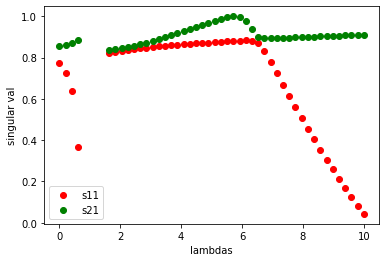

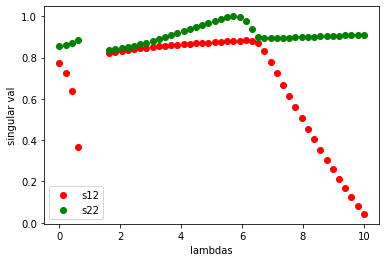

In [23]:
La = 0.929
y0 =  [-5.44816131e-22,  1.20091568e-22, -2.07094657e-01, -2.48118371e-01]
eps = 1e-3
delta = 1

stepsNorms = []
stepsSingVal = []
for init_approx in [[i + 10 * eps for i in y0], y0]: # , [i - 10 * eps for i in y0]]:
    K1, K2 = 1.57, 10
    D, A = 10, 2.0
    linsp = [0, 10, 50]
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    K = [0, K1, K2, 0, K2, K1]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle, lam_steps, s1, s2 = lambda_iterate_svd(linsp, D, K, A, init_approx, system, bc, 50000, filename)
#     print("len pos sing val = ", len(pos_sing_values))
    stepsSingVal.append([lam_steps, s1, s2])
#     print("stepsSingval = ", stepsSingVal[-1])
    print('init_approx =', str(init_approx))
    steps, y_norm, z_norm = norm_param(linsp, D, K, A, init_approx, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])

j = 1
for [steps, s1, s2] in stepsSingVal:
    plt.scatter(steps, s1, color = "red", label = 's1' + str(j))
    plt.scatter(steps, s2, color = "green", label = 's2' + str(j))
    plt.xlabel("lambdas")
    plt.ylabel("singular val")
    plt.legend()
    plt.show()
    j+= 1


In [21]:
7.65796841e-20, 6.31011425e-22, 1.52523164e+00, 9.90371807e-01

## La = 10.24

D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(9.24, 11.24, 50)
Det Change, lambda = 10.26
y_approx =  [ 3.51687632e-19 -5.76499324e-19 -1.82216483e+00 -2.80836999e-01]  la =  10.260408163265307


<ipython-input-7-c34cbacdaf35>:7: RuntimeWarning: overflow encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-7-c34cbacdaf35>:7: RuntimeWarning: invalid value encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-7-c34cbacdaf35>:14: RuntimeWarning: overflow encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2
<ipython-input-7-c34cbacdaf35>:14: RuntimeWarning: invalid value encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2
<ipython-input-6-137c9ee1b564>:90: RuntimeWarning: invalid value encountered in less
  if (np.abs(redisuals) < 1e-6).all():
C:\Users\victo\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


init_approx = [0.01, 0.01, -1.80653113, -0.267616815]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(9.24, 11.24, 50)
Det Change, lambda = 10.26
y_approx =  [ 3.44319955e-19 -5.75376377e-19 -1.82216483e+00 -2.80836999e-01]  la =  10.260408163265307
init_approx = [3.61828163e-19, -2.15234554e-19, -1.81653113, -0.277616815]


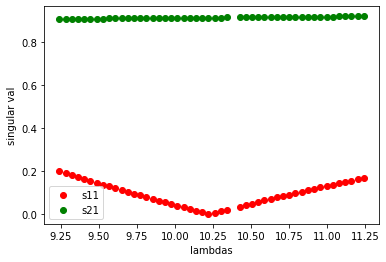

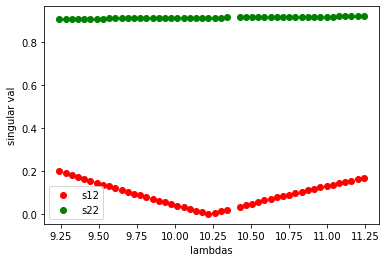

In [11]:
La = 10.24
y0 =  [ 3.61828163e-19, -2.15234554e-19, -1.81653113e+00, -2.77616815e-01]
eps = 1e-3
delta = 1

stepsNorms = []
stepsSingVal = []
for init_approx in [[i + 10 * eps for i in y0], y0]: # , [i - 10 * eps for i in y0]]:
    K1, K2 = 1.57, 10
    D, A = 10, 2.0
    linsp = [La - 1, La + 1, 50]
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    K = [0, K1, K2, 0, K2, K1]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle, lam_steps, s1, s2 = lambda_iterate_svd(linsp, D, K, A, init_approx, system, bc, 50000, filename)
#     print("len pos sing val = ", len(pos_sing_values))
    stepsSingVal.append([lam_steps, s1, s2])
#     print("stepsSingval = ", stepsSingVal[-1])
    print('init_approx =', str(init_approx))
    steps, y_norm, z_norm = norm_param(linsp, D, K, A, init_approx, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])

j = 1
for [steps, s1, s2] in stepsSingVal:
    plt.scatter(steps, s1, color = "red", label = 's1' + str(j))
    plt.scatter(steps, s2, color = "green", label = 's2' + str(j))
    plt.xlabel("lambdas")
    plt.ylabel("singular val")
    plt.legend()
    plt.show()
    j+= 1


## La = 47.5

D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(46.42, 48.42, 50)
Det Change, lambda = 47.52
y_approx =  [ 7.74955501e-21  1.13902387e-21 -7.82425656e+00 -8.39855169e-01]  la =  47.52204081632653
init_approx = [0.01, 0.01, -7.83304827, -1.19425494]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(46.42, 48.42, 50)
Det Change, lambda = 47.52
y_approx =  [-8.69430521e-22 -1.28652403e-21 -7.82425656e+00 -8.39855169e-01]  la =  47.52204081632653
init_approx = [-5.24808263e-19, 1.50595357e-19, -7.84304827, -1.20425494]


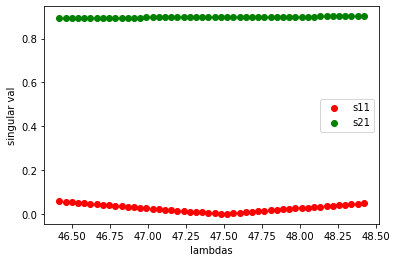

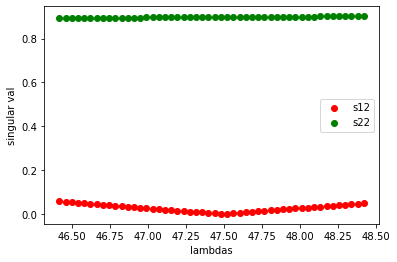

In [17]:
La = 47.42
y0 =  [-5.24808263e-19, 1.50595357e-19, -7.84304827e+00, -1.20425494e+00]
eps = 1e-3
delta = 1

stepsNorms = []
stepsSingVal = []
for init_approx in [[i + 10 * eps for i in y0], y0]: # , [i - 10 * eps for i in y0]]:
    K1, K2 = 1.57, 10
    D, A = 10, 2.0
    linsp = [La - 1, La + 1, 50]
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    K = [0, K1, K2, 0, K2, K1]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle, lam_steps, s1, s2 = lambda_iterate_svd(linsp, D, K, A, init_approx, system, bc, 50000, filename)
#     print("len pos sing val = ", len(pos_sing_values))
    stepsSingVal.append([lam_steps, s1, s2])
#     print("stepsSingval = ", stepsSingVal[-1])
    print('init_approx =', str(init_approx))
    steps, y_norm, z_norm = norm_param(linsp, D, K, A, init_approx, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])

j = 1
for [steps, s1, s2] in stepsSingVal:
    plt.scatter(steps, s1, color = "red", label = 's1' + str(j))
    plt.scatter(steps, s2, color = "green", label = 's2' + str(j))
    plt.xlabel("lambdas")
    plt.ylabel("singular val")
    plt.legend()
    plt.show()
    j+= 1


In [28]:
s11 = stepsSingVal[0][1]
s21 = stepsSingVal[0][2]
s12 = stepsSingVal[1][1]
s22 = stepsSingVal[1][2]
print(s11)
print(s12)
print(s21)
print(s22)

[0.04258841636191163, 0.022604065359401935, 0.002993466229752047, 0.01614163670369241, 0.034977312211342114, 0.053316296404784615, 0.08899573783334438, 0.10623090293141048, 0.1231247043495072, 0.1396418345323477, 0.15580500414176668, 0.1710295804641168, 0.18669233685039602, 0.2019614245635322, 0.21687521501896417, 0.23145779663399188, 0.2457266058470279, 0.2596956312913098, 0.2733769078558789]
[0.04259300349747837, 0.022604065372137952, 0.002993466228929328, 0.01614163670661322, 0.03497731220991933, 0.05331629640704027, 0.08899573783720462, 0.10623090292970461, 0.12312470434948702, 0.13964183453047768, 0.15580500414707596, 0.1710295804652699, 0.18669233684557915, 0.20196142456650193, 0.2168752150159062, 0.23145779663596566, 0.24572660584654768, 0.2596956312897099, 0.273376907855773]
[0.9111229317411421, 0.9117491784791072, 0.9123758094025441, 0.9130039921581217, 0.9136412174536402, 0.9142775951448677, 0.9155736685132422, 0.9162303863326345, 0.9168944664683688, 0.9175674181642077, 0.918

### критические $\lambda$ до 100: ###
### y_approx =  [-4.14343882e-22 -4.38348126e-22 -1.82214349e+00 -5.05485279e-01]  la =  10.141327909887359 

### y_approx =  [-5.24808263e-19  1.50595357e-19 -7.84304827e+00 -1.20425494e+00]  la =  47.42054818523154

### попробуем построить в них ветви

D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(10.141327909887359, 0, 1300)
y_approx =  [ 6.77682375e-20  1.62654399e-20 -9.68114352e-01  1.63475285e-01]  la =  4.6842161246592875


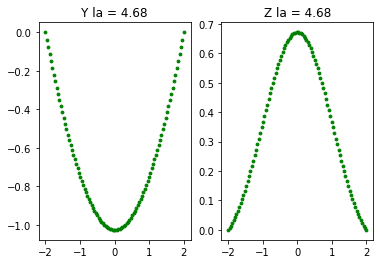

init_approx = [-4.14343882e-22, -4.38348126e-22, -1.82214349, -0.505485279]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(10.141327909887359, 0, 1300)
y_approx =  [-3.08410091e-22 -1.57954070e-21 -1.80268741e+00 -1.47212232e+00]  la =  4.6842161246592875


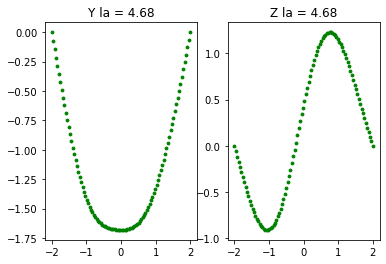

init_approx = [-0.01, -0.01, -1.83214349, -0.515485279]


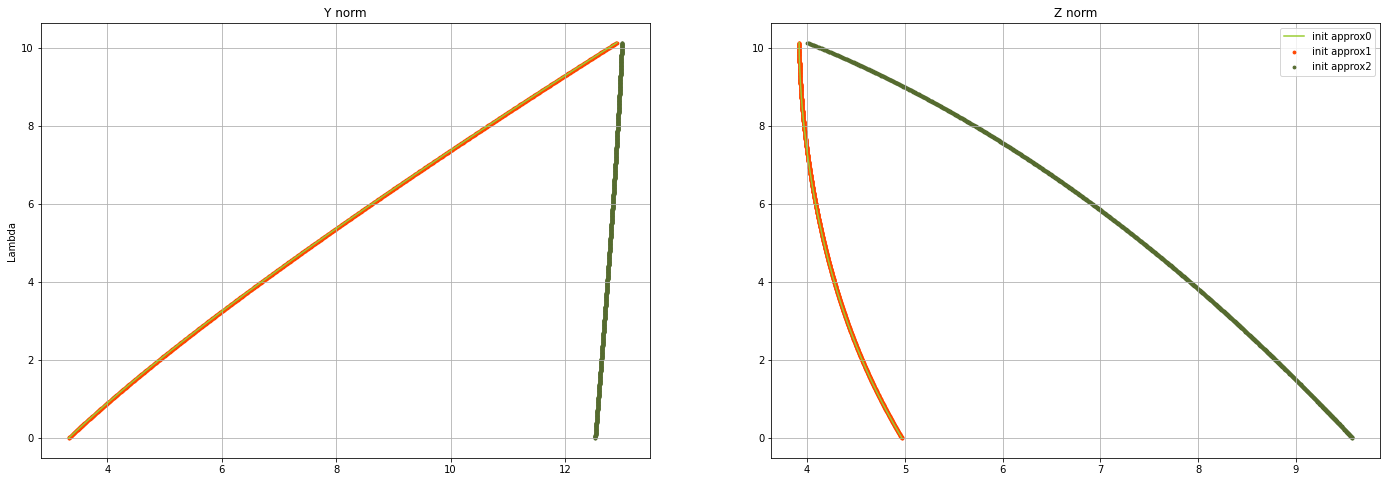

In [357]:
# развилка рядом с La = 10.26

y0 = [-4.14343882e-22, -4.38348126e-22, -1.82214349e+00, -5.05485279e-01]
La = 10.141327909887359
eps = 1e-3

stepsNorms = []
for init_approx in [y0, [i - 10 * eps for i in y0]]: # , [i - 10 * eps for i in y0]]:
    K1, K2 = 1.57, 10
    D, A = 10, 2.0
    linsp = [La, 0, 1300]
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    K = [0, K1, K2, 0, K2, K1]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 700, filename)
    print('init_approx =', str(init_approx))
    steps, y_norm, z_norm = norm_param(linsp, D, K, A, init_approx, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])

i = 0
fig, (yax, zax) = plt.subplots(1, 2, figsize=(24, 8))
#ax = fig.add_subplot(111)   
for [steps, y_norm, z_norm] in stepsNorms[:1]:
    yax.plot(y_norm, steps, color = colors[i], label = 'init approx' + str(i))
    zax.plot(z_norm, steps, color = colors[i], label = 'init approx' + str(i))
    i+= 1

for [steps, y_norm, z_norm] in stepsNorms:
    yax.scatter( y_norm, steps, s = 8, color = colors[i], label = 'init approx' + str(i))
    yax.set_title('Y norm')
    #yax.grid()
    zax.scatter(z_norm, steps, s = 8, color = colors[i], label = 'init approx' + str(i))
    zax.set_title('Z norm')
    i+= 1
yax.grid()
yax.set_ylabel("Lambda")
zax.grid()
zax.legend()
plt.show()

fork10_14_down = [steps, y_norm, z_norm]

# $\lambda = 47.5 $ # 

# Объединим три графика #

D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(0.929, 50, 800)
Det Change, lambda = 10.14
y_approx =  [-4.14343882e-22 -4.38348126e-22 -1.82214349e+00 -5.05485279e-01]  la =  10.141327909887359


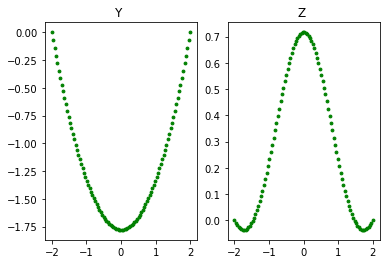

Det Change, lambda = 10.26
y_approx =  [ 1.19151634e-21 -3.72423790e-21 -1.81940725e+00 -2.79255313e-01]  la =  10.264158948685857


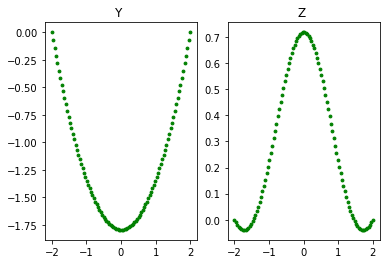

<ipython-input-269-c34cbacdaf35>:7: RuntimeWarning: overflow encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-269-c34cbacdaf35>:7: RuntimeWarning: invalid value encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-269-c34cbacdaf35>:14: RuntimeWarning: overflow encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2
<ipython-input-269-c34cbacdaf35>:14: RuntimeWarning: invalid value encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2


Det Change, lambda = 47.42
y_approx =  [-5.24808263e-19  1.50595357e-19 -7.84304827e+00 -1.20425494e+00]  la =  47.42054818523154


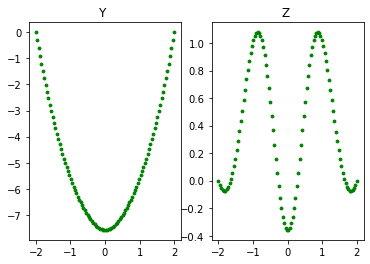

Det Change, lambda = 47.54
y_approx =  [ 3.85949308e-22 -2.68166811e-22 -7.82434204e+00 -8.39232375e-01]  la =  47.54337922403004


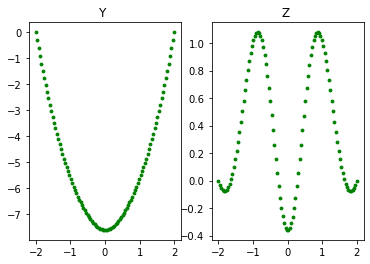

init_approx = [0.01, 0.01, -1.80653113, -0.267616815]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(0.929, 50, 800)
init_approx = [3.61828163e-19, -2.15234554e-19, -1.81653113, -0.277616815]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(10.141327909887359, 0, 1300)
y_approx =  [ 6.77682375e-20  1.62654399e-20 -9.68114352e-01  1.63475285e-01]  la =  4.6842161246592875


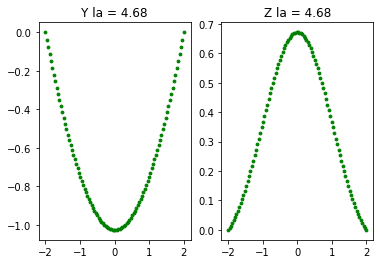

init_approx = [-4.14343882e-22, -4.38348126e-22, -1.82214349, -0.505485279]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(10.141327909887359, 0, 1300)
y_approx =  [-3.08410091e-22 -1.57954070e-21 -1.80268741e+00 -1.47212232e+00]  la =  4.6842161246592875


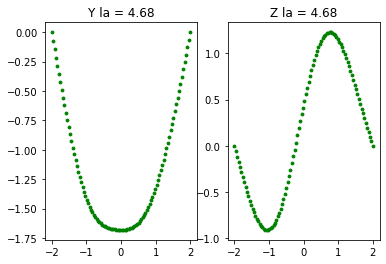

init_approx = [-0.01, -0.01, -1.83214349, -0.515485279]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(47.42054818523154, 10, 2000)
y_approx =  [ 4.42797775e-20 -1.15209918e-20 -8.00820084e+00 -4.20944939e+00]  la =  34.33552408244172


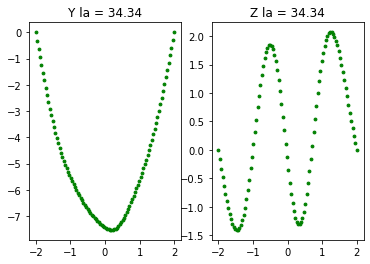

y_approx =  [-3.27379142e-20 -7.70371978e-34 -8.13589979e+00 -5.47404432e+00]  la =  21.231780345742333


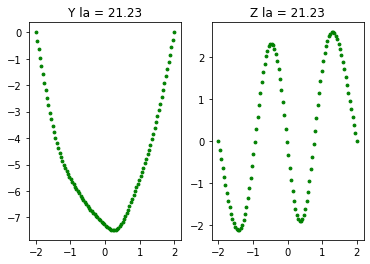

init_approx = [-0.01, -0.01, -7.8530482699999995, -1.21425494]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(47.42054818523154, 10, 2000)
y_approx =  [ 1.43047384e-20  3.26029228e-20 -5.97001360e+00  4.92039391e-01]  la =  34.33552408244172


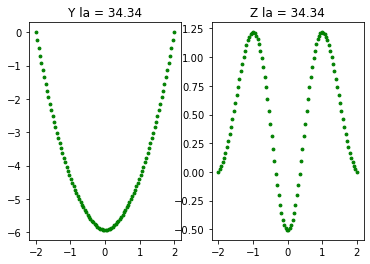

y_approx =  [ 1.04701407e-20 -1.66660237e-20 -4.76131482e+00  1.90877595e+00]  la =  21.231780345742333


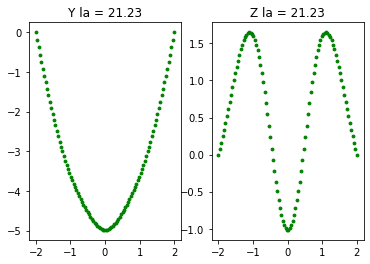

init_approx = [-0.0010000000000000005, -0.0009999999999999998, -7.84404827, -1.2052549399999999]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(47.42054818523154, 10, 2000)
y_approx =  [ 1.43047384e-20  3.26029228e-20 -5.97001360e+00  4.92039391e-01]  la =  34.33552408244172


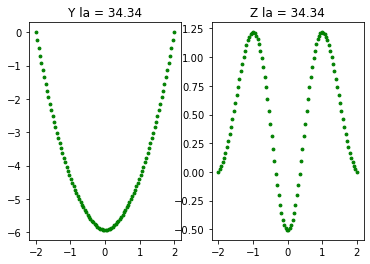

y_approx =  [ 1.04701407e-20 -1.66660237e-20 -4.76131482e+00  1.90877595e+00]  la =  21.231780345742333


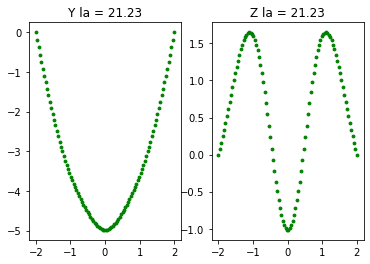

init_approx = [-5.24808263e-19, 1.50595357e-19, -7.84304827, -1.20425494]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(47.42054818523154, 10, 2000)
y_approx =  [ 1.43047384e-20  3.26029228e-20 -5.97001360e+00  4.92039391e-01]  la =  34.33552408244172


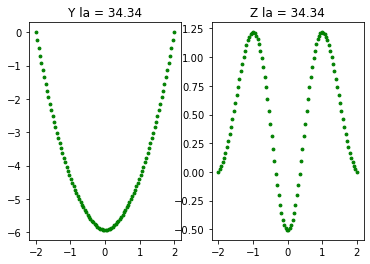

y_approx =  [ 1.04701407e-20 -1.66660237e-20 -4.76131482e+00  1.90877595e+00]  la =  21.231780345742333


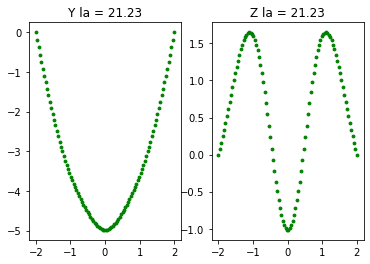

init_approx = [0.01, 0.01, -7.83304827, -1.19425494]


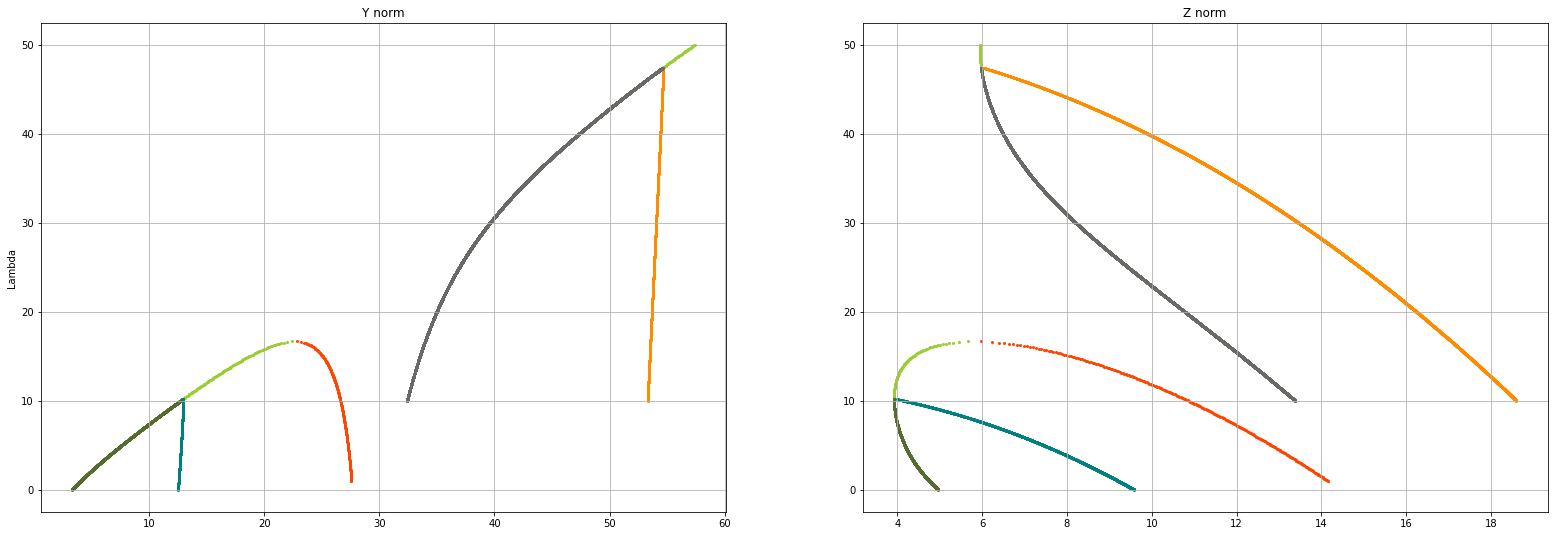

In [361]:
# 1
La = 0.929
y0 =  [ 3.61828163e-19, -2.15234554e-19, -1.81653113e+00, -2.77616815e-01]
eps = 1e-3

stepsNorms = []
for init_approx in [[i + 10 * eps for i in y0], y0]: # , [i - 10 * eps for i in y0]]:
    K1, K2 = 1.57, 10
    D, A = 10, 2.0
    linsp = [La, 50, 800]
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    # print('init_approx =', str(init_approx))
    K = [0, K1, K2, 0, K2, K1]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 50000, filename)
    print('init_approx =', str(init_approx))
    steps, y_norm, z_norm = norm_param(linsp, D, K, A, init_approx, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])


# 2 ------------------------------------------------------------------------------------------
# развилка рядом с La = 10.26

y0 = [-4.14343882e-22, -4.38348126e-22, -1.82214349e+00, -5.05485279e-01]
La = 10.141327909887359

for init_approx in [y0, [i - 10 * eps for i in y0]]: # , [i - 10 * eps for i in y0]]:
    K1, K2 = 1.57, 10
    D, A = 10, 2.0
    linsp = [La, -50, 2000]
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    K = [0, K1, K2, 0, K2, K1]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 700, filename)
    print('init_approx =', str(init_approx))
    steps, y_norm, z_norm = norm_param(linsp, D, K, A, init_approx, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])



# 3 ------------------------------------------------------------------------------------------

y0 = [-5.24808263e-19, 1.50595357e-19, -7.84304827e+00, -1.20425494e+00]
La = 47.42054818523154

for init_approx in [[i - 10 * eps for i in y0], [i - eps for i in y0], y0, [i + 10 * eps for i in y0]]: # , [i - 10 * eps for i in y0]]:
    K1, K2 = 1.57, 10
    D, A = 10, 2.0
    linsp = [La, -20, 2200]
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    K = [0, K1, K2, 0, K2, K1]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 700, filename)
    print('init_approx =', str(init_approx))
    steps, y_norm, z_norm = norm_param(linsp, D, K, A, init_approx, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])
    
# graph ------------------------------------------------------------------------------------------
i = 0
fig, (yax, zax) = plt.subplots(1, 2, figsize=(27, 9))
for [steps, y_norm, z_norm] in stepsNorms:
    yax.scatter( y_norm, steps, s = 4, color = colors[i], label = 'init approx' + str(i))
    yax.set_title('Y norm')
    #yax.grid()
    zax.scatter(z_norm, steps, s = 4, color = colors[i], label = 'init approx' + str(i))
    zax.set_title('Z norm')
    i += 1
yax.grid()
yax.set_ylabel("Lambda")
zax.grid()
# zax.legend()
plt.show()

D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(0.929, 50, 800)
Det Change, lambda = 10.14
y_approx =  [-4.14343882e-22 -4.38348126e-22 -1.82214349e+00 -5.05485279e-01]  la =  10.141327909887359


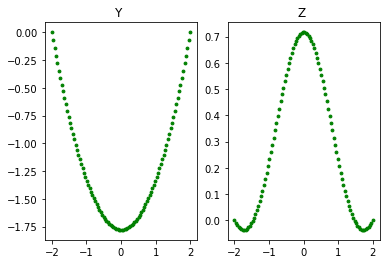

Det Change, lambda = 10.26
y_approx =  [ 1.19151634e-21 -3.72423790e-21 -1.81940725e+00 -2.79255313e-01]  la =  10.264158948685857


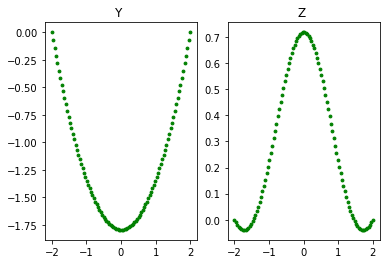

<ipython-input-269-c34cbacdaf35>:7: RuntimeWarning: overflow encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-269-c34cbacdaf35>:7: RuntimeWarning: invalid value encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-269-c34cbacdaf35>:14: RuntimeWarning: overflow encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2
<ipython-input-269-c34cbacdaf35>:14: RuntimeWarning: invalid value encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2


Det Change, lambda = 47.42
y_approx =  [-5.24808263e-19  1.50595357e-19 -7.84304827e+00 -1.20425494e+00]  la =  47.42054818523154


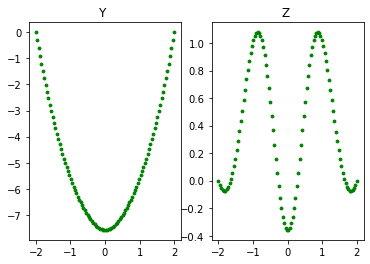

Det Change, lambda = 47.54
y_approx =  [ 3.85949308e-22 -2.68166811e-22 -7.82434204e+00 -8.39232375e-01]  la =  47.54337922403004


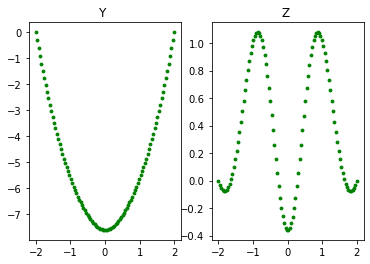

init_approx = [0.01, 0.01, -1.80653113, -0.267616815]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(0.929, 50, 800)
init_approx = [3.61828163e-19, -2.15234554e-19, -1.81653113, -0.277616815]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(10.141327909887359, -50, 2000)
y_approx =  [-2.99133383e-20 -1.71816781e-21  6.23006018e-01  1.33280752e+00]  la =  -10.888581149147793


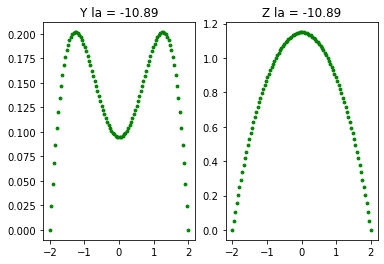

y_approx =  [3.78163202e-21 1.30761814e-22 1.85994253e+00 2.66995202e+00]  la =  -31.948575914991288


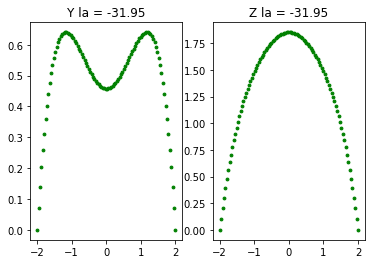

Det Change, lambda = -42.03
y_approx =  [-5.15247142e-21  3.13921347e-24  2.37966739e+00  3.20567666e+00]  la =  -42.02728769578782


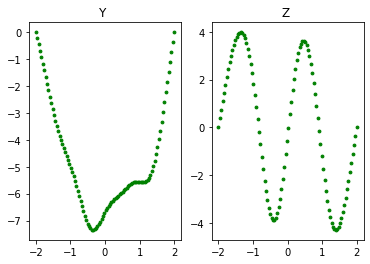

init_approx = [-4.14343882e-22, -4.38348126e-22, -1.82214349, -0.505485279]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(10.141327909887359, -50, 2000)


In [ ]:
# 1
La = 0.929
y0 =  [ 3.61828163e-19, -2.15234554e-19, -1.81653113e+00, -2.77616815e-01]
eps = 1e-3

stepsNorms = []
for init_approx in [[i + 10 * eps for i in y0], y0]: # , [i - 10 * eps for i in y0]]:
    K1, K2 = 1.57, 10
    D, A = 10, 2.0
    linsp = [La, 50, 800]
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    # print('init_approx =', str(init_approx))
    K = [0, K1, K2, 0, K2, K1]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 50000, filename)
    print('init_approx =', str(init_approx))
    steps, y_norm, z_norm = norm_param(linsp, D, K, A, init_approx, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])


# 2 ------------------------------------------------------------------------------------------
# развилка рядом с La = 10.26

y0 = [-4.14343882e-22, -4.38348126e-22, -1.82214349e+00, -5.05485279e-01]
La = 10.141327909887359

for init_approx in [y0, [i - 10 * eps for i in y0]]: # , [i - 10 * eps for i in y0]]:
    K1, K2 = 1.57, 10
    D, A = 10, 2.0
    linsp = [La, -50, 2000]
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    K = [0, K1, K2, 0, K2, K1]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 700, filename)
    print('init_approx =', str(init_approx))
    steps, y_norm, z_norm = norm_param(linsp, D, K, A, init_approx, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])



# 3 ------------------------------------------------------------------------------------------

y0 = [-5.24808263e-19, 1.50595357e-19, -7.84304827e+00, -1.20425494e+00]
La = 47.42054818523154

for init_approx in [[i - 10 * eps for i in y0], [i - eps for i in y0], y0, [i + 10 * eps for i in y0]]: # , [i - 10 * eps for i in y0]]:
    K1, K2 = 1.57, 10
    D, A = 10, 2.0
    linsp = [La, -50, 2400]
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    K = [0, K1, K2, 0, K2, K1]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 700, filename)
    print('init_approx =', str(init_approx))
    steps, y_norm, z_norm = norm_param(linsp, D, K, A, init_approx, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])
    
# graph ------------------------------------------------------------------------------------------
i = 0
fig, (yax, zax) = plt.subplots(1, 2, figsize=(27, 9))
for [steps, y_norm, z_norm] in stepsNorms:
    yax.scatter( y_norm, steps, s = 4, color = colors[i], label = 'init approx' + str(i))
    yax.set_title('Y norm')
    #yax.grid()
    zax.scatter(z_norm, steps, s = 4, color = colors[i], label = 'init approx' + str(i))
    zax.set_title('Z norm')
    i += 1
yax.grid()
yax.set_ylabel("Lambda")
zax.grid()
# zax.legend()
plt.show()

D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(0.929, 3, 100)
init_approx = [0.01, 0.01, -1.80653113, -0.267616815]
y_approx =  [-1.22751904e-20 -3.23051801e-21 -1.79808728e+00 -1.67888908e+00]  la =  1.954040404040404


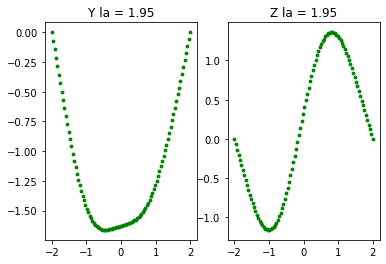

y_approx =  [-6.68443969e-20 -5.21777500e-21 -1.79963478e+00 -1.60725250e+00]  la =  3.0


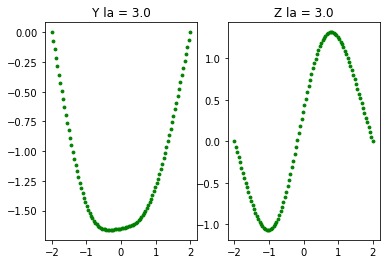

D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(0.929, 3, 100)
init_approx = [3.61828163e-19, -2.15234554e-19, -1.81653113, -0.277616815]
y_approx =  [ 3.50490071e-21 -2.66214538e-21 -4.17657938e+00 -3.66756544e+00]  la =  1.954040404040404


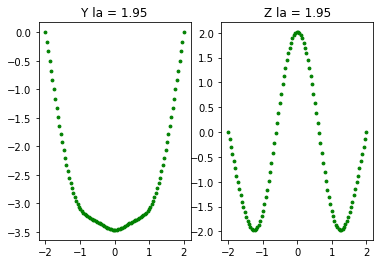

y_approx =  [-2.52867445e-20  1.72654105e-21 -4.15897195e+00 -3.59524766e+00]  la =  3.0


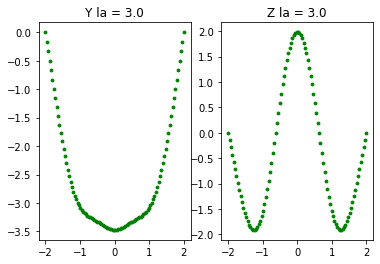

D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(0.929, 3, 100)
init_approx = [-0.0009999999999999996, -0.0010000000000000002, -1.8175311299999999, -0.278616815]


<ipython-input-189-c34cbacdaf35>:7: RuntimeWarning: overflow encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-189-c34cbacdaf35>:7: RuntimeWarning: invalid value encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-189-c34cbacdaf35>:14: RuntimeWarning: overflow encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2
<ipython-input-189-c34cbacdaf35>:14: RuntimeWarning: invalid value encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2


y_approx =  [ 8.86663434e-22  1.47159576e-21 -5.81098150e-01  3.59773678e-01]  la =  1.954040404040404


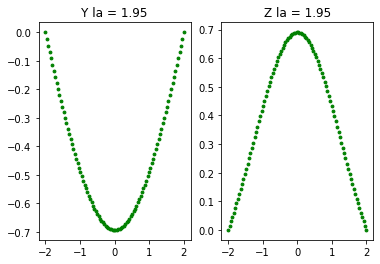

y_approx =  [ 1.83388400e-22 -2.49030557e-22 -7.23789054e-01  2.85464432e-01]  la =  3.0


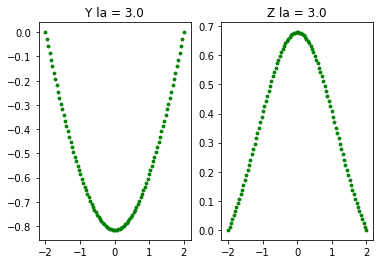

D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(0.929, 3, 100)
init_approx = [-0.01, -0.01, -1.82653113, -0.287616815]
y_approx =  [ 8.86663434e-22  1.47159576e-21 -5.81098150e-01  3.59773678e-01]  la =  1.954040404040404


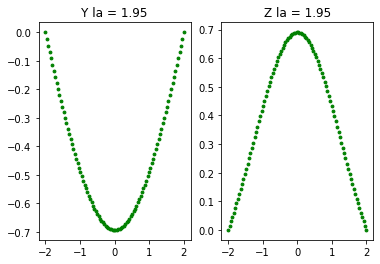

y_approx =  [ 1.83388400e-22 -2.49030557e-22 -7.23789054e-01  2.85464432e-01]  la =  3.0


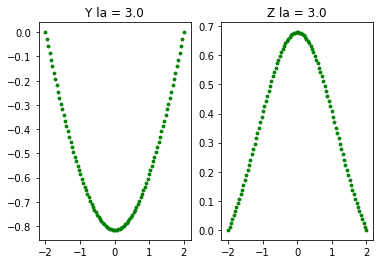

In [247]:
La = 0.929
y_approx =  [-5.44816131e-22,  1.20091568e-22, -2.07094657e-01, -2.48118371e-01]

eps = 1e-3
for init_approx in [[i + 10 * eps for i in y0], y0, [i - eps for i in y0], [i - 10 * eps for i in y0]]:
    for [K1, K2] in [[1.57, 10]]:
        D, A = 10, 2.0
        La = 0.929
        linsp = [La, 3, 100]
        print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
        print('init_approx =', str(init_approx))
        K = [0, K1, K2, 0, K2, K1]
        filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
        dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 50, filename)
        # norm_param_graph(linsp, np.linspace(-A, A, 100), init_approx, system, bc, [])

# Код

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import det, inv, svd, norm
import random

In [2]:
colors = ['(255, 140, 0)', '(255, 69, 0)', '(154, 205, 50)', '(128, 128, 0)', '(85, 107, 47)',
              '(0, 128, 128)', '(70, 130, 180)', '(139, 69, 19)', '(105, 105, 105)']
random.shuffle(colors)
colors = [tuple(map(lambda x: int(x) / 255, color[1:-1].split(', '))) for color in colors]

In [3]:
# график лямбда - det, оставить только точки по модулю < 1
def scatterNoBlowouts(lambdas_for_plot, dets, Title, plot = False):
    n = len(dets)
    ind = list(filter(lambda i: abs(dets[i]) < 1, list(range(n))))
    
    fig = plt.figure(figsize=(20, 8))
    ax = fig.gca()
    
    x = [lambdas_for_plot[i] for i in ind]
    y = [dets[i] for i in ind]
    d = ((max(y) + 0.1) - (min(y) - 0.1)) / 20
    ax.set_yticks(np.arange(min(y) - 0.1, max(y) + 0.1, d))
    c = ((max(x) + 1) - (min(x) - 1)) / 25
    ax.set_xticks(np.arange(min(x) - 1, max(x) + 1, c))
    #ax.set_xticks(np.arange(-4, 4, 0.25))
    ax.set_xlabel("Lambda")
    ax.set_ylabel("Det")
    plt.scatter(x, y)
    if plot:
        plt.plot(x, y, color = 'gray')
    plt.title(Title)
    plt.grid()
    plt.show()

    
# график лямбда - det, оставить только точки по модулю < 2
def scatterAll(lambdas_for_plot, dets, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle, Title, plot = False):
    n = len(dets)
    ind = list(filter(lambda i: abs(dets[i]) < 2, list(range(n))))
    
    fig = plt.figure(figsize=(20, 8))
    ax = fig.gca()
    
    x = [lambdas_for_plot[i] for i in ind]
    y = [dets[i] for i in ind]
    
    ax.set_yticks(np.arange(-1.1, 1.1, 0.1))
    c = ((max(x) + 1) - (min(x) - 1)) / 25
    ax.set_xticks(np.arange(min(x) - 1, max(x) + 1, c))
    #ax.set_xticks(np.arange(-4, 4, 0.25))
    ax.set_xlabel("Lambda")
    ax.set_ylabel("Det")
    plt.scatter(x, y, color = 'steelblue', s = 8)
    plt.scatter(lambdas_mistake_zerodet, [0] * len(lambdas_mistake_zerodet), s = 15, color = 'green', label = 'zero det')
    plt.scatter(lambdas_mistake_nan, [0] * len(lambdas_mistake_nan), s = 8, color = 'orange', label = 'nans in matrix')
    plt.scatter(lambdas_mistake_cycle, [0] * len(lambdas_mistake_cycle), s = 15, color = 'red', label = 'too many steps')
    if plot:
        plt.plot(x, y, color = 'gray')
    plt.title(Title)
    plt.legend()
    plt.grid()
    plt.show()

In [4]:
glob_vals = []

def lambda_iterate_svd(linsp, D, K, A, init_approx, system, bc, draw_nth, filename):
    global k11, k12, k13, k21, k22, k23
    k11, k12, k13, k21, k22, k23 = K
    SignChangeFile = open('ProjFiles/SignChange.txt', 'a')
    Lambdas0File = open('ProjFiles/Lambdas0File_{D}_{k11}_{k12}_{k13}.txt'.format(D = D, k11 = k11, k12 = k12, k13 = k13), 'a')
    
    global la
    params, bc_params = [], []
    lambdas = np.linspace(linsp[0], linsp[1], linsp[2])
    lambdas_for_plot, dets, steps = [], [], []
    s1, s2 = [], []
    lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = [], [], []
    abcFile = open(filename, 'a')
    y_approx = init_approx
    cnt = 0
    for la in lambdas:
        cnt += 1
        print(la, file = abcFile)
        result = shooting(np.linspace(-A, A, 100), y_approx, system, params, bc, bc_params, filename)
        if result[0] != 0:
            
            if result[0] == 1:
                lambdas_mistake_zerodet.append(la) # det ~= 0
                steps.append(la)
                ss = result[4]
                s1.append(ss[-1])
                s2.append(ss[-2])
            
            continue
        steps.append(la)
        ss = result[4]
        s1.append(ss[-1])
        s2.append(ss[-2])
        if cnt % draw_nth == 0:
            global glob_vals
            print("y_approx = ", y_approx, " la = ", la)  # ------------------------------  print y_approx
         
    # сохранить точку смены знака
        if len(dets) > 0 and result[3] * dets[-1] < 0:
            print('\n', D, K, A, y_approx, la, file = SignChangeFile)
            print('Det Change, lambda = {lamb}'.format(lamb = round(la, 2)))
            print("y_approx = ", y_approx, " la = ", la)  # ------------------------------  print y_approx

        y_approx = result[1]
        print("det = ", result[3], file = abcFile)
        lambdas_for_plot.append(la)
        dets.append(result[3])
    SignChangeFile.close()
    return dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle, steps, s1, s2

In [51]:
temp = np.eye(3)
eig, _ = np.linalg.eig(temp)


array([1., 1., 1.])

In [5]:
def norm_param(linsp, D, K, A, init_approx, system, bc, bc_params):
    global k11, k12, k13, k21, k22, k23
    k11, k12, k13, k21, k22, k23 = K
    
    global la
    params, bc_params = [], []
    lambdas = np.linspace(linsp[0], linsp[1], linsp[2])
    lambdas_for_plot, dets = [], []
    lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = [], [], []
    abcFile = open(filename, 'a')
    y_approx = init_approx
    cnt = 0
    y_norm, z_norm = [], []
    for la in lambdas:
        
        cnt += 1
        print(la, file = abcFile)
        result = shooting(np.linspace(-A, A, 100), y_approx, system, params, bc, bc_params, filename)
        if result[0] != 0:
            
            if result[0] == 1:
                
                lambdas_mistake_zerodet.append(la) # det ~= 0
            if result[0] == 2:
                lambdas_mistake_nan.append(la) # nans in matrix
            if result[0] == 3:
                lambdas_mistake_cycle.append(la) # too many steps
            continue
        
        # сохранить точку смены знака
        #if len(dets) > 0 and result[3] * dets[-1] < 0:
            
        steps, yval, zval = grkutta_(system, result[1], np.linspace(-A, A, 100), '')
        
        y_approx = result[1]
        print("det = ", result[3], file = abcFile)
        y_norm.append(np.linalg.norm(yval))
        z_norm.append(np.linalg.norm(zval))
        lambdas_for_plot.append(la)
        dets.append(result[3])
    
    return lambdas_for_plot, y_norm, z_norm #, yval, zval  #  last obtained solutions

In [6]:
def grkutta(f, y_value, steps, title):   # runge_kutta(f, y_value, steps) + graph
    y = np.hstack((steps[0], y_value.copy()))
    yval, zval = [y[1]], [y[2]]
    for i in range(1, len(steps)):
        h = steps[i] - steps[i - 1]
        t1 = steps[i]
        k1 = count(f, y, 0, np.array([0] * (len(y) - 1)))
        k2 = count(f, y, h / 2, k1 * h / 2)
        k3 = count(f, y, h / 2, k2 * h / 2)
        k4 = count(f, y, h, k3 * h)
        y[1:] += h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        y[0] = t1
        yval.append(y[1])
        zval.append(y[2])

    fig, (yax, zax) = plt.subplots(1, 2)
    yax.scatter(steps, yval, s = 8, color = 'green')
    yax.set_title('Y ' + title)
    zax.scatter(steps, zval, s = 8, color = 'green')
    zax.set_title('Z ' + title)
    plt.show()
    return list(steps), yval, zval

def grkutta_(f, y_value, steps, title):   # runge_kutta(f, y_value, steps) + graph
    y = np.hstack((steps[0], y_value.copy()))
    yval, zval = [y[1]], [y[2]]
    for i in range(1, len(steps)):
        h = steps[i] - steps[i - 1]
        t1 = steps[i]
        k1 = count(f, y, 0, np.array([0] * (len(y) - 1)))
        k2 = count(f, y, h / 2, k1 * h / 2)
        k3 = count(f, y, h / 2, k2 * h / 2)
        k4 = count(f, y, h, k3 * h)
        y[1:] += h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        y[0] = t1
        yval.append(y[1])
        zval.append(y[2])
    return list(steps), yval, zval



def count(f, args, h, k):
    ''' calculates f(args[0] + h, args[1:] + k) '''
    res = []
    args0 = args.copy()
    args0[0] += h
    args0[1:] += k
    for i in range(len(f)):
        res.append(f[i](args0))
    return np.array(res)


def runge_kutta(f, y_value, steps):
    y = np.hstack((steps[0], y_value.copy()))
    for i in range(1, len(steps)):
        h = steps[i] - steps[i - 1]
        t1 = steps[i]
        k1 = count(f, y, 0, np.array([0] * (len(y) - 1)))
        k2 = count(f, y, h / 2, k1 * h / 2)
        k3 = count(f, y, h / 2, k2 * h / 2)
        k4 = count(f, y, h, k3 * h)
        y[1:] += h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        y[0] = t1
    return y[1:]



def shooting(time_steps, y_approx, f, params, bc, bc_params, sourceFilename, solver=runge_kutta):
    global la
    boarder_values = bc
    y_value = y_approx
    space = time_steps
    #----
    eps = 1e-4
    step = 0
    
    determ = 0.0
    cnt = 0
    sourceFile = open(sourceFilename, 'a')
    zeroDetFile = open('zeroDet.txt', 'a')
    while True:
        step += 1
        add = runge_kutta(f, y_value, space)
        
        redisuals = np.hstack((y_value, add))     #   невязки
        redisuals = boarder_values(np.hstack((y_value, add)))
        
        if (np.abs(redisuals) < 1e-6).all():
            u,s,v = np.linalg.svd(D, full_matrices=False)
            return 0, y_value, add, determ, s, D
            # break
        
        D = np.eye(len(f))
        for i in range(len(f)):
            y = y_value.copy()
            y[i] += eps
            dadd = runge_kutta(f, y, space)
            dres = np.hstack((y, dadd))
            # dr = norm(boarder_values, dres)
            dr = boarder_values(dres)
            D[:, i] = (dr - redisuals) / eps
        determ = np.linalg.det(D)

        if abs(determ) < 1e-6:
            print("det ~= 0", D, file = sourceFile)
            print("det ~= 0", D, file = zeroDetFile)
            u,s,v = np.linalg.svd(D)
            return 1, y_value, add, determ, s, D
        
        if np.isnan(D).any():
            print('nan!!!', file = sourceFile)
            return 2, y_value, add, determ, [], D
        
        if step > 50:
            print("step > 50", "det =", determ, file = sourceFile)
            return 3, y_value, add, determ, [], D
        y_value = y_value - np.linalg.pinv(D) @ redisuals       # Newton
    sourceFile.close()

In [10]:
matrix = np.eye(3)
type(matrix)
u,s,h = np.linalg.svd(matrix, full_matrices=False)
len(s)

3

In [7]:
def F1(args):
    x, y, z, dy, dz = args[:5]
    return dy
def F2(args):
    global la, k11, k12, k13
    x, y, z, dy, dz = args[:5]
    return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
def G1(args):
    x, y, z, dy, dz = args[:5]
    return dz
def G2(args):
    global la, k21, k22, k23
    x, y, z, dy, dz = args[:5]
    return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2

system = [F1, G1, F2, G2]

def boarder_values(l):
    return np.array([l[0], l[1], l[4], l[5]])
#  0      1      2      3     4    5    6     7   
# y(-A) z(-A) y'(-A) z'(-A) y(A) z(A) y'(A) z'(A)


bc = boarder_values

------------------------------------------------------


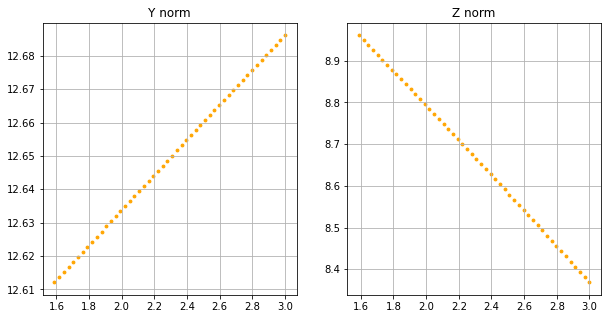

In [10]:
L = 1.588235
K1, K2, D, A = 1.57, 10, 10, 2.0
linsp = [L, 3, 50]
K = [0, K1, K2, 0, K2, K1]

y0 = [-1.26, 0.06, 0, 0]
#norm_param_graph(linsp, np.linspace(-A, A, 100), y0, system, bc, [])

print("------------------------------------------------------")
y0 = [ 0, 0, -1.797, -1.7048]
steps, y_norm, z_norm = norm_param(linsp, D, K, A, y0, system, bc, [])
# norm_param_graph(linsp, D, K, A, init_approx, system, bc, bc_params):
fig, (yax, zax) = plt.subplots(1, 2, figsize=(10, 5))
yax.scatter(steps, y_norm, s = 8, color = 'orange')
yax.set_title('Y norm')
yax.grid()
zax.scatter(steps, z_norm, s = 8, color = 'orange')
zax.set_title('Z norm')
zax.grid()
plt.show()


------
--------